# Notebook for RRDE analysis

### 1. Initialization

In [2]:
%load_ext autoreload
from analysis_RRDE import *
from analysis_RRDE import ECSA_calculation
import tkinter as tk
from tkinter import filedialog 
from tkinter import messagebox
import os
import pandas as pd
from numpy import savetxt

root = tk.Tk()
root.withdraw()
root.lift()
root.attributes("-topmost", True)

''

#### 1.1 Introducing experimental parameters

In [3]:
# Variables
A_geo = 0.196               # cm2
loading = 10                # ug/cm2
ir_comp = 26                # ohm
scan_rate = 0.05            # V/s for CO stripping
index = 11                  # number of lines of info to be removed

Pt_mass = loading * A_geo   # ug
charge_ecsa = 0.000210      # C/cm2

### 2. Analysis of single measurements

#### 2.1 Ring current vs disc potential

In [91]:
%autoreload
nbr_files = 1
file_ring_current = filedialog.askopenfilename(title="Choose the file to be analyzed.")
print(file_ring_current)
V_disk, I_disk = get_disk_voltage_current(file_ring_current, index)
I_ring = get_ring_current(file_ring_current, index)

L:/P15 SEM/Guilherme/Huizes Samples/GC_Lis PdKB-0401/LIS PdtKB 100µgcm2 -T4 water ipa  IC=0.2/ML00/ML00_M021_Cyc0002.txt


Looking at several rotation rates.

In [47]:
%autoreload
nbr_files = 2 #not important, just not 1
files = filedialog.askopenfilenames(title="Choose the files to be analyzed.")
print(files)
data_matrix_disk = []
data_matrix_ring = []

for file in files: 
    V_disk, I_disk = get_disk_voltage_current(file, index)
    I_ring = get_ring_current(file, index)
    data_matrix_disk.append(V_disk)
    data_matrix_disk.append(I_disk)
    data_matrix_ring.append(V_disk)
    data_matrix_ring.append(I_ring)

data_matrix_disk = np.transpose(data_matrix_disk)
data_matrix_ring = np.transpose(data_matrix_ring)

('L:/P15 SEM/Guilherme/Huizes Samples/GC_Lis PdKB-0401/LIS PdtKB 100µgcm2 -T4 water ipa  IC=0.2/ML00/ML00_M019_Cyc0002.txt', 'L:/P15 SEM/Guilherme/Huizes Samples/GC_Lis PdKB-0401/LIS PdtKB 100µgcm2 -T4 water ipa  IC=0.2/ML00/ML00_M021_Cyc0002.txt', 'L:/P15 SEM/Guilherme/Huizes Samples/GC_Lis PdKB-0401/LIS PdtKB 100µgcm2 -T4 water ipa  IC=0.2/ML00/ML00_M023_Cyc0002.txt', 'L:/P15 SEM/Guilherme/Huizes Samples/GC_Lis PdKB-0401/LIS PdtKB 100µgcm2 -T4 water ipa  IC=0.2/ML00/ML00_M025_Cyc0002.txt')


Text(0, 0.5, 'Current [mA]')

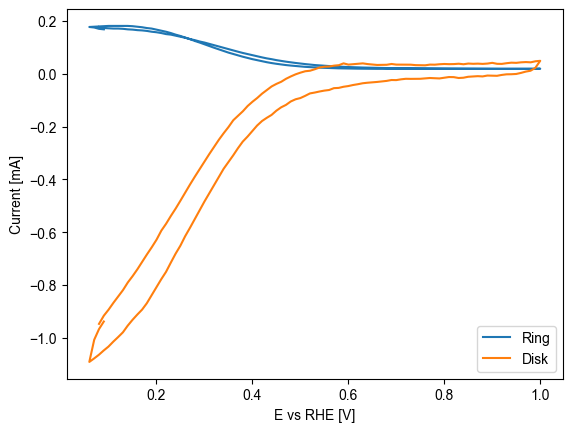

In [93]:
# Plotting
plt.rcParams["font.family"] = "Arial"
if nbr_files == 1: 
    plt.plot(V_disk, I_ring, label="Ring")
    plt.plot(V_disk, I_disk, label="Disk")
    plt.legend()
else:
    legend = ["900 rpm", "1600 rpm", "2500 rpm", "400 rpm"]
    fig, ax = plt.subplots()
    ax.set_prop_cycle('color', ['turquoise', 'turquoise', 'green', 'green', 'blue', 'blue', 'orange', 'orange'])
    for i in range(0, len(data_matrix_disk[0]), 2):
        plt.plot(data_matrix_disk[:,i], data_matrix_disk[:,i+1])
        plt.plot(data_matrix_ring[:,i], data_matrix_ring[:,i+1], label="_nolegend_")
    plt.legend(legend)
plt.xlabel("E vs RHE [V]")
plt.ylabel("Current [mA]")

#### 2.2 Selectivity
Import the correct file (CV/ringHold under O2 at 1600 rpm) above.

In [95]:
%autoreload
S = compute_selectivity(I_ring, I_disk, efficiency=0.4)

Text(0.5, 0, 'E vs RHE [V]')

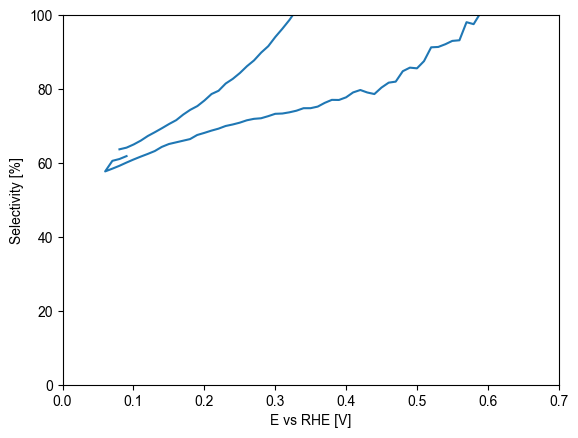

In [96]:
plt.plot(V_disk, S)
plt.ylim([0, 100])
plt.xlim([0, 0.7])
plt.ylabel("Selectivity [%]")
plt.xlabel("E vs RHE [V]")

#### 2.3 HER activity check

In [11]:
%autoreload
nbr_files = 1
file_HER = filedialog.askopenfilename(title="Choose the file to be analyzed.")
print(file_HER)
V_disk_HER, I_disk_HER = get_disk_voltage_current(file_HER, index)

L:/P15 SEM/Guilherme/Huizes Samples/GC_Lis PdKB-0401/LIS PdtKB 100µgcm2 -T2 water ipa  IC=0.2 rpt/ML01/ML01_M011_Cyc0003.txt


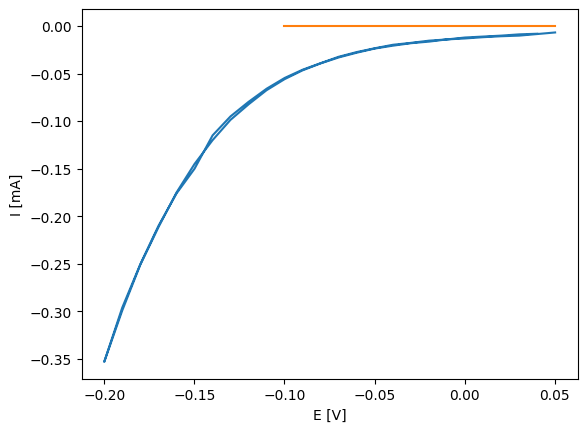

In [12]:
x_lower_limit = -0.1
x_upper_limit = 0.05
reference = HER_activity_check(V_disk_HER, I_disk_HER, x_lower_limit, x_upper_limit)

#### 2.3 ECSA calculation and activity calculation
Load the the CO stripping file.

In [ ]:
%autoreload
nbr_files = 1
file_ECSA = filedialog.askopenfilename(title="Choose the file to be analyzed.")
print(file_ECSA)
V, I = get_disk_voltage_current(file_ECSA, index)

Introduce background.

In [ ]:
if nbr_files == 1:
    background_file = filedialog.askopenfilename(title="Choose the background file.")
    print(background_file)
    background_V, background_I = get_disk_voltage_current(background_file, index)

Corrections.

In [ ]:
%autoreload
reference = 0   #potential shift of the reference electrode
if nbr_files == 1:
    background_V_RHE = copy.deepcopy(background_V)
    background_I_RHE = copy.deepcopy(background_I)
    V_RHE = copy.deepcopy(V)
    I_corrected = copy.deepcopy(I)

    background_V_RHE = RHE_correction(background_V_RHE, reference)
    V_RHE = RHE_correction(V_RHE, reference)
    I_corrected = background_correction_current(I_corrected, background_I_RHE)  

In [ ]:
%autoreload
lower_voltage = 0.06   #from your macrolist
upper_voltage = 1.09
# The following values need to be tuned
DL_start = 0.50   #determines the starting point for your baseline
DL_end = 0.55     #determines the end point for your baseline
atol = 0.5        #determines the threshold where the CO peak deviates too much from baseline 

ecsa_calculation = ECSA_calculation(V_RHE, I, background_V_RHE, background_I)

specific_ECSAs, ECSAs = ecsa_calculation.calculating_ECSA(
    lower_voltage,
    upper_voltage,
    DL_start,
    DL_end,
    atol,
    scan_rate,
    charge_ecsa,
    Pt_mass,
)

ecsa_calculation.plotting()

Save your data to .csv files.

In [13]:
# For easier export of data
disk_data = np.transpose(np.array([V_disk, I_disk]))
ring_data = np.transpose(np.array([V_disk, I_ring]))   #the ring's potential comes from the disk
disk_data_HER = np.transpose(np.array([V_disk_HER, I_disk_HER]))

# First argument determines the name of the file to be saved, second is the data (numpy array) 
# you want to save. Examples of data you could export
np.savetxt('m2_HER.csv', disk_data_HER, delimiter=",")

### 3. Analysis of several measurements
Here is an example of how to use the code for this purpose. Quantities and plot labels etc can be changed depending on what one wants to work on.

Import the files that you created in the previous step that you now want to compare. Important to change the name of the file the data is stored in (i.e. m1) so that you don't overwrite your already imported data.

In [14]:
m_file = pd.read_csv("m2_HER.csv", header=None)
m1 = np.array(m_file)

In [15]:
# Put together all the files you want to analyse
HER_voltages = np.transpose([V1_HER, V2_HER])
HER_currents = np.transpose([I1_HER, I2_HER])

Text(0, 0.5, 'I [mA]')

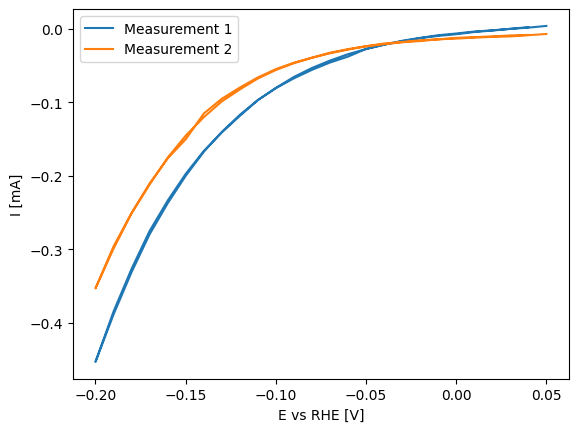

In [19]:
# Plotting
for i in range(len(HER_voltages[0])):
    plt.plot(HER_voltages[:,i], HER_currents[:,i])
plt.legend(['Measurement 1', 'Measurement 2'])
plt.xlabel('E vs RHE [V]')
plt.ylabel('I [mA]')